# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [336]:
# Installing the necessary dependencies
!pip install pandas numpy seaborn matplotlib scikit-learn xgboost

In [337]:
# Importing libraries to read and manipulate the data
import numpy as np
import pandas as pd

# Importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries for model building, tuning, metrics and statistics

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

## Data Overview

- Observations
- Sanity checks

In [338]:
df = pd.read_csv('EasyVisa.csv')

In [339]:
# Let's view the first and last five rows of the dataset
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [340]:
# Let's check the data types and establish if there are null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Some of these variables should have been used as categorical, but instead, they exist as object formats. We will need to convert all columns with the datatype `object` into `category`.

In [341]:
# Selecting the dtypes object
cols = df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [342]:
# Looping through the columns and converting their dtypes from object to category
for i in cols.columns:
    df[i] = df[i].astype('category')

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


We have converted them into categorical variables. The memory usage has also reduced from 2.3 MB to 2.0 MB

### Number of Rows and Columns

In [344]:
df.shape

(25480, 12)

- The dataset has 25480 rows and 12 columns.
- The dataset has no missing values. Additionally, we can establish these using the `isnull` method.
- From the 12 columns present, we have 1 target variable, the `case_status`. It is good practice to check the classes present in the target variable. We use the `.unique()` method for this task.

In [345]:
df['case_status'].unique()

['Denied', 'Certified']
Categories (2, object): ['Certified', 'Denied']

The target variable has two classes present. This is a binary classification problem. Later, we will convert them to numerical values for easy processing.

### Checking for missing values

In [346]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

The above code confirms that there are no missing values in the data.

In [347]:
# Let's check for duplicate values
df[df.duplicated()]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


We have no duplicate values present in the dataset.

#### Let's drop the column `case_id` from the dataframe as it doesn't provide any material information for model building. We use the `drop()` method

In [348]:
df.drop(['case_id'], axis=1, inplace=True)

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


In [350]:
df.shape

(25480, 11)

We now have 11 columns present. we have 10 independent variables and one target variable. The memory required to store the dataframe is now 797.7 kB from 2.0 MB, which represents a third the size of the original dataframe.

### Let's have a look at the summary of the dataset

In [351]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


- The average `prevailing_wage` for occupation is united states is USD 74,456 while the median (~50th percentile of wages) is USD 70,308.
- The average `no_of_employees` in the employer's organization are 5667 while the median number of employees in the employer's organization are 2109.

### Let's have a look at the statistical summary of all `int64` variables

In [352]:
df.describe(include = ['int64']).T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0


### Statistics summary of all `float64` variables

In [353]:
# let's provide summary statistics of all float64 variables
df.describe(include = ['float64']).T

,count,mean,std,min,25%,50%,75%,max
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [354]:
# Let's create a function to label barplots

def custom_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # captures the length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  

In [355]:
# Let's create a function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [356]:
# function to create labeled barplots

def labeled_barplot(data, feature, feature_2, order, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    feature_2: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='viridis',
        order=order,
        hue=feature_2,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()  # show the plot

In [358]:
# Let's create a function to print the category counts and plot a stacked bar chart

def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### A. Univariate Analysis

### Information of continent the employee

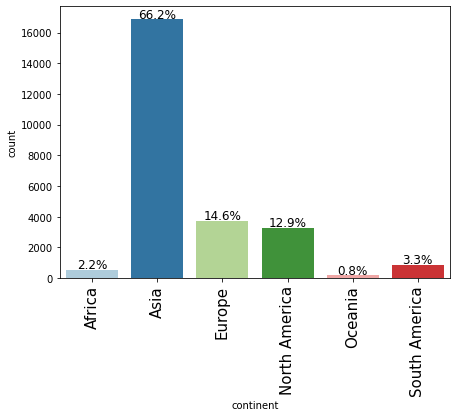

In [359]:
custom_barplot(df, "continent", perc=True)

More than 60% of employees come from the continent of Asia. 

### Information of education of the employee

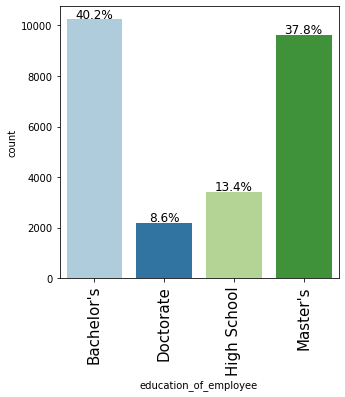

In [360]:
custom_barplot(df, "education_of_employee", perc=True)

- Majority of employees have a bachelor's (40.2%) or a master's (37.8%).
- Minority of applicants have a high school diploma (13.4%) and doctorate with the lowest percentage of (8.6%).

### Observations on employees `job_experience`

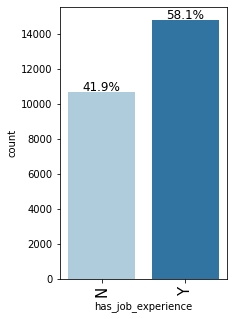

In [361]:
custom_barplot(df, "has_job_experience", perc=True)

58.1% of employees have previous job experiences while about 42% of employees have no job experience. 

### The number of employees that require any job training

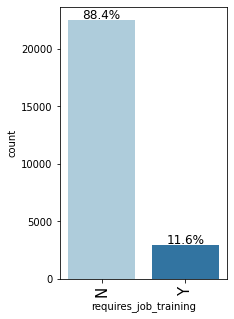

In [362]:
custom_barplot(df, "requires_job_training", perc=True)

Approximately 88% of employees do not require job training. Although we observed that only 58.1% had prior job experience. It appears that some occupations require employees with no prior job experience

### Information of foreign worker's intended region of employment in the US

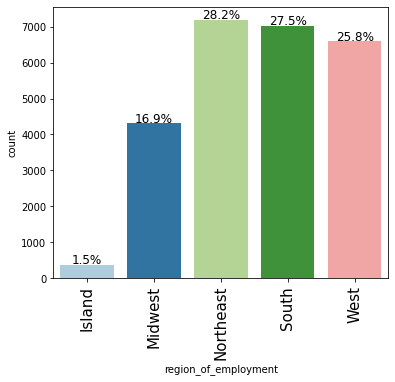

In [363]:
custom_barplot(df, "region_of_employment", perc=True)

As it appears, the Northeast, South and West regions in the US have almost equal employment opportunities with 28.2%, 27.5%, and 25.8% respectively. These regions are closely followed by Midwest (16.9%) and Island with (1.5%).

### Full Time Position vs Part Time Position

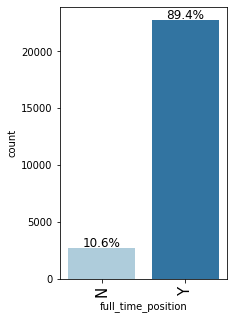

In [364]:
custom_barplot(df, "full_time_position", perc=True)

About 90% of work positions offer full-time positions. Only 10.6% of of employers offer part-time positions. 

### Observations on case_status

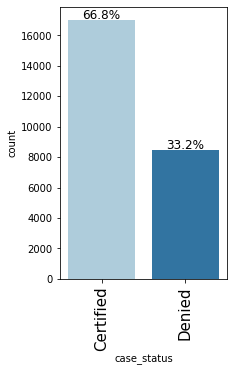

In [365]:
custom_barplot(df, "case_status", perc=True)

66.8% of visa applications are certified while 33.2% of applications are denied. 

### B. Bivariate Analysis

### Year of establishment vs case_status

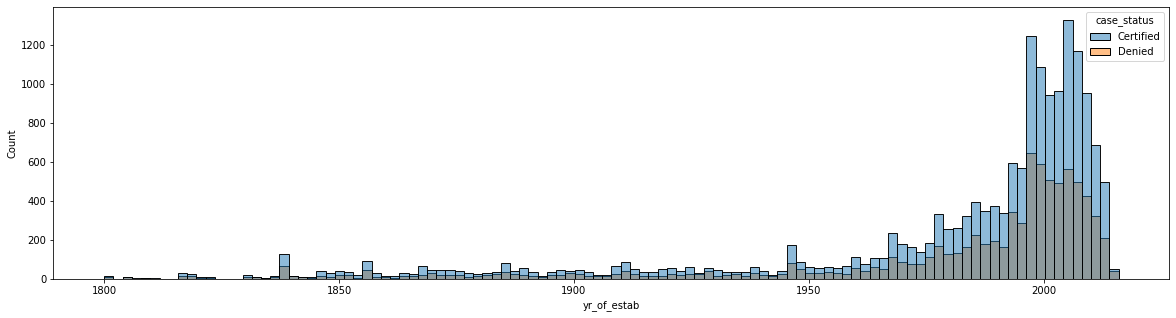

In [366]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="yr_of_estab", hue="case_status");

50% of all cases are certified than denied for employers irrespective of the employer's year of establishment 

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


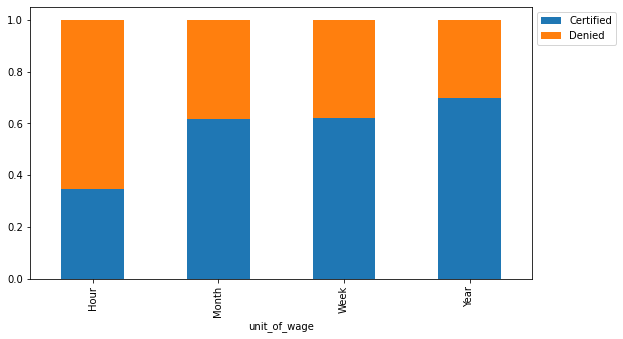

In [367]:
stacked_barplot(df, "unit_of_wage", "case_status")

Almost 70% of cases are certified when the `unit_of_wage` is yearly. Less than 40% of cases are denied when the `unit_of_wage` is hourly.

### Prevailing_wage vs case_status

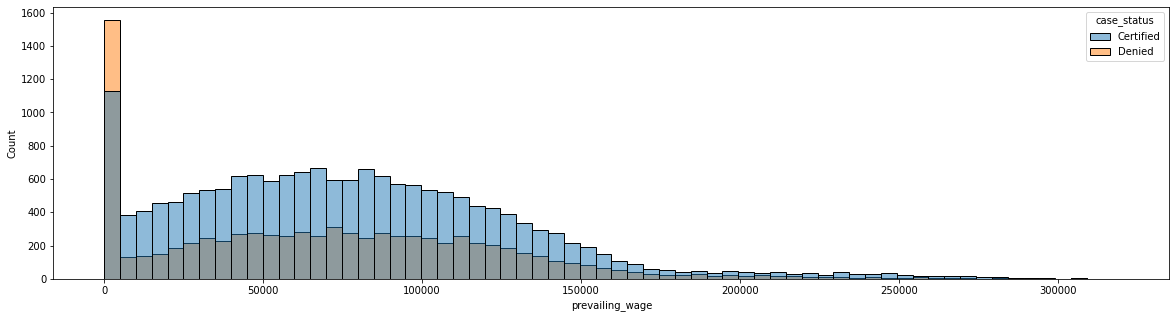

In [368]:
plt.figure(figsize=(20,5))
sns.histplot(df, x="prevailing_wage", hue="case_status");

% certifications in comparison to % denied drops slightly on the lower end of the prevailing_wage and increases slightly on the upper end of the prevailing_wage

### Continent vs case status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


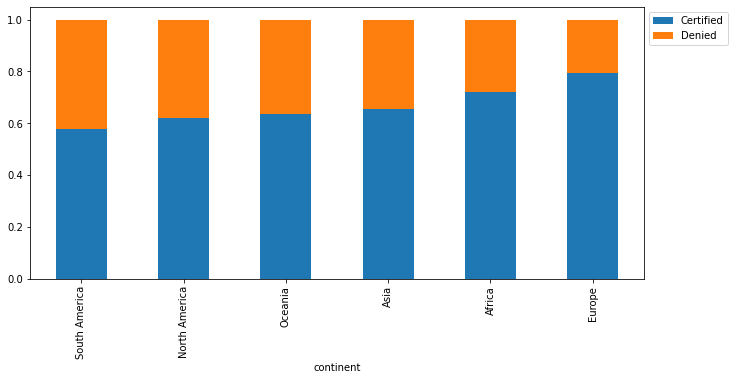

In [369]:
stacked_barplot(df, "continent", "case_status")

- Irrespective of the continent the employee is from, more cases are certified than denied
- The trend observed w.r.t % certification for continents is Europe > Africa > Asia > Oceania > North America & South America

### Education vs case status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


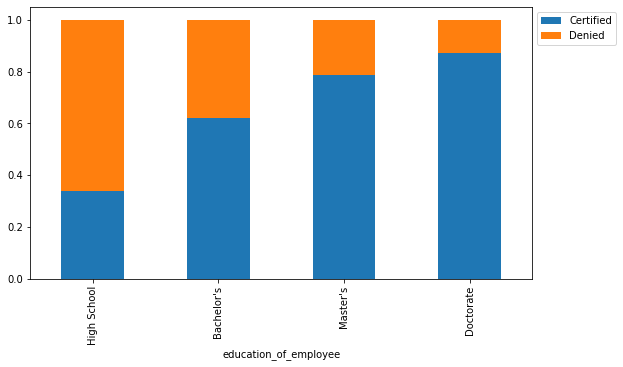

In [370]:
stacked_barplot(df, "education_of_employee", "case_status")

As expected the, the trend observed w.r.t % visa certification for education of employees is Doctorate > Master's > Bachelor's > High School 

### Job experience vs case status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


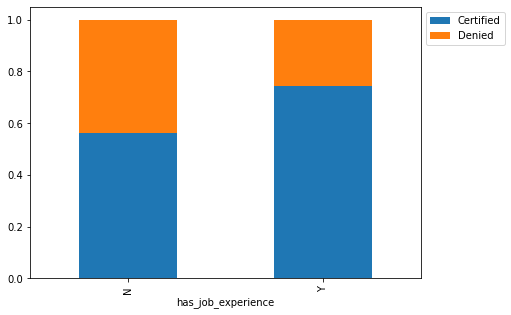

In [371]:
stacked_barplot(df, "has_job_experience", "case_status")

Majority of the exployees with job experience have their visa certified compared to those without job experience.

### Requires_job_training vs case status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


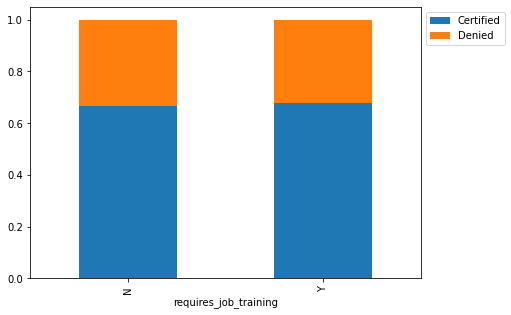

In [372]:
stacked_barplot(df, "requires_job_training", "case_status")

Trend observed w.r.t. % visa certifications for `requires_job_training` is same (Yes ~ No)

### Region of employment vs case status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


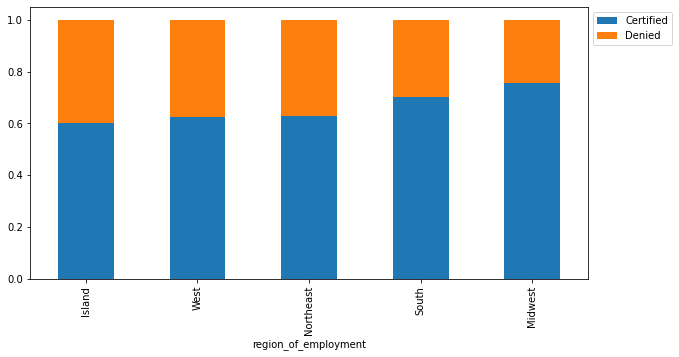

In [373]:
stacked_barplot(df, "region_of_employment", "case_status")

Trend observed w.r.t visa certifications for `region_of_employment` is MidWest > South > Northeast ~ West > Island 

### Full time position vs case status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


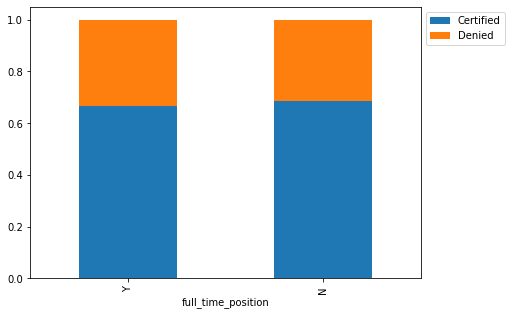

In [374]:
stacked_barplot(df, "full_time_position", "case_status")

Trend observed w.r.t. % visa certifications for `full_time_position` is the same (Yes ~ No)

### Leading questions

### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

In [375]:
#Let's group data by `education_of_employee` and count the numbers of each `case_status` for each category
df.groupby('education_of_employee')['case_status'].value_counts()

education_of_employee           
Bachelor's             Certified    6367
                       Denied       3867
Doctorate              Certified    1912
                       Denied        280
High School            Denied       2256
                       Certified    1164
Master's               Certified    7575
                       Denied       2059
Name: case_status, dtype: int64

Using the custom barplot, let's create a plot of the data above

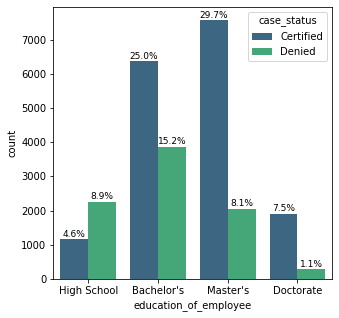

In [376]:
labeled_barplot(df,'education_of_employee','case_status', order=["High School","Bachelor's","Master's","Doctorate"], perc=True)

- As the graph aboves shows, the ratio of applications being certified versus denied increases considerably as an applicant's highest level of education achieved increases.
- The ratio of an applicant with a high school diploma being approved versus denied is ~1:2, whereas the same ratio for an applicant with a doctorate is ~7:1.

### 2. How does the visa status vary across different continents? 

In [377]:
df.groupby('continent')['case_status'].value_counts()

continent               
Africa         Certified      397
               Denied         154
Asia           Certified    11012
               Denied        5849
Europe         Certified     2957
               Denied         775
North America  Certified     2037
               Denied        1255
Oceania        Certified      122
               Denied          70
South America  Certified      493
               Denied         359
Name: case_status, dtype: int64

Using the custom barplot, let's create a plot of the data above

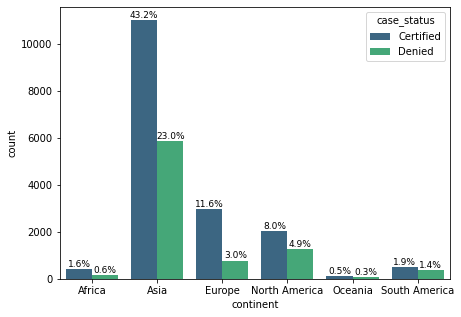

In [378]:
labeled_barplot(df,'continent','case_status', order=None, perc=True)

- Applicants from Asia comprise ~2/3 of all applications. These applicants have almost a 2:1 ratio of approvals to denials.
- An application from a European applicant has the best ratio of approvals to denials (~4:1).

### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

In [379]:
df.groupby('has_job_experience')['case_status'].value_counts()

has_job_experience           
N                   Certified     5994
                    Denied        4684
Y                   Certified    11024
                    Denied        3778
Name: case_status, dtype: int64

Using the custom barplot, let's create a plot of the data above

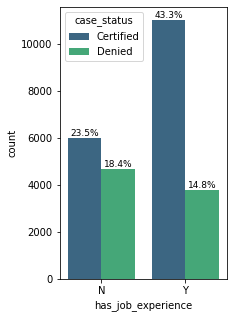

In [380]:
labeled_barplot(df,'has_job_experience','case_status', order=None, perc=True)

- Work experience appear to affect the visa status with more experienced professionals visa status being certified compared to employees with no work experience. 
- Half the number of employees with no job experience have their visa status certified compared to those with job experience. 

### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

In [383]:
df.groupby('unit_of_wage')['case_status'].value_counts()

unit_of_wage           
Hour          Denied        1410
              Certified      747
Month         Certified       55
              Denied          34
Week          Certified      169
              Denied         103
Year          Certified    16047
              Denied        6915
Name: case_status, dtype: int64

Using the custom barplot, let's create a plot of the data above

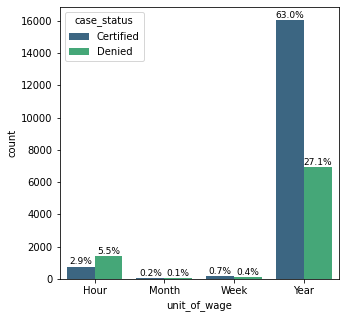

In [384]:
labeled_barplot(df,'unit_of_wage','case_status', order=None, perc=True)

- Applicants who are applying to work in a job with an hourly rate have a ratio of approved versus denied applications of ~1:2. Additionally, these applicants comprise only ~8% of all applications, but comprise ~17% of all denials.

### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [385]:
df.groupby('prevailing_wage')['case_status'].value_counts()

prevailing_wage           
2.1367           Certified    1
                 Denied       0
2.9561           Denied       1
                 Certified    0
3.0031           Denied       1
                             ..
315497.6000      Denied       0
318446.0500      Certified    1
                 Denied       0
319210.2700      Denied       1
                 Certified    0
Name: case_status, Length: 50908, dtype: int64

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

Let's encode `Certified` as 1 and `Denied` as 0

In [386]:
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [387]:
df['case_status'] = df['case_status'].apply(lambda x: 1 if x == "Certified" else 0)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [388]:
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,1
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,1
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,1
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,1


All `Certified` have been replaced with 1 and `Denied` with 0

In [389]:
# Separating features and the target column
X = df.drop("case_status", axis=1)
y = df["case_status"]

In [390]:
X = pd.get_dummies(X, drop_first=True)

In [391]:
X

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,2601,2008,77092.5700,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,1
25476,3274,2006,279174.7900,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,1
25477,1121,1910,146298.8500,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
25478,1918,1887,86154.7700,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,1


In [392]:
y

0        0
1        1
2        0
3        0
4        1
        ..
25475    1
25476    1
25477    1
25478    1
25479    1
Name: case_status, Length: 25480, dtype: category
Categories (2, int64): [1, 0]

Let's split the data into train and test sets in 70:30 ratio

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

Let's confirm the shape of both data sets and the ratio of classes is the same across both train and test datasets

In [394]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print(' ')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print(' ')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
 
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
 
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


Defining functions to provide metric scores (i.e., accuracy, recall, and precision) on the train and test datasets and to show the resulting confusion matrices

In [395]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf



In [396]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664443  0.742605   0.751884  0.747216


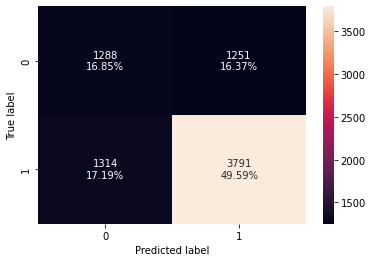

In [397]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Training performance:\n",d_tree_model_train_perf)

d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

The Decision Tree is working well on the training data, but is not able to generalize well on the test data, indicating the model is overfitting.

Confusion Matrix -

- Applicant was approved and the model predicted approval : True Positive (observed=1,predicted=1)

- Applicant was denied and the model predicted approval : False Positive (observed=0,predicted=1)

- Applicant was denied and the model predicted denial : True Negative (observed=0,predicted=0)

- Applicant was approved and the model predicted denial : False Negative (observed=1,predicted=0)

## Building bagging and boosting models

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985367  0.986317   0.991729  0.989016
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.692177  0.766112     0.7714  0.768747


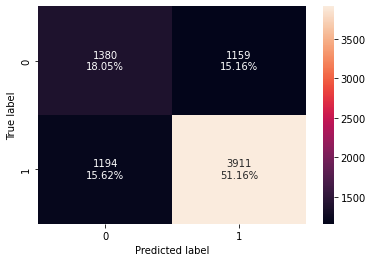

In [398]:
#Fitting the model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

#Calculating different metrics
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

#Let's create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(bagging, X_test, y_test)

Similar to the Decision Tree model, the Bagging classifer is overfitting to the training dataset. However, it has a higher F1 score.

### 2. Random Forest

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.719126  0.830167   0.768032  0.797891


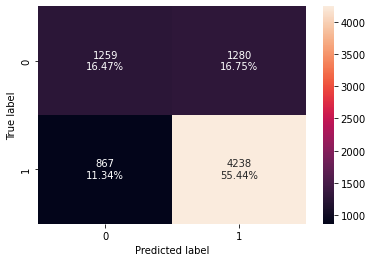

In [399]:
#Fitting the model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

#Calculating different metrics
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(rf,X_test,y_test)

Similar to the models above, the Random Forest is overfitting to the training dataset, but has the highest F1 score so far.

### 3. AdaBoost Classifier

Training performance 
    Accuracy    Recall  Precision        F1
0  0.738058  0.887434   0.760411  0.819027
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.732993  0.885015    0.75653  0.815744


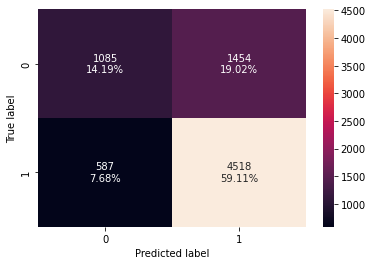

In [400]:
#Fitting the model
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)

ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print("Testing performance \n",ab_classifier_model_test_perf)

#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(ab_classifier, X_test,y_test)

The AdaBoost classifer performs well on both the training and testing datasets. This indicates that the model is not overfitting.
Additionally, the model performs the best of any model yet (i.e., highest F1 score) on the testing data.

### 4. Gradient Boosting Classifier

Training performance 
    Accuracy    Recall  Precision        F1
0  0.759419  0.882901   0.784106  0.830576
Training performance 
    Accuracy    Recall  Precision       F1
0  0.744636  0.873262   0.773555  0.82039


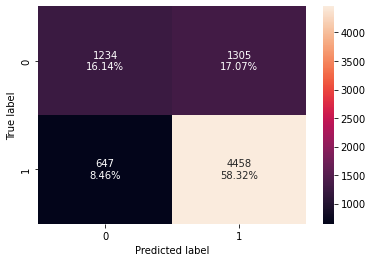

In [401]:
#Fitting the model
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

#Calculating different metrics
gbc_classifier_model_train_perf = model_performance_classification_sklearn(gbc,X_train,y_train)
print("Training performance \n",gbc_classifier_model_train_perf)

gbc_classifier_model_test_perf = model_performance_classification_sklearn(gbc,X_test,y_test)
print("Training performance \n",gbc_classifier_model_test_perf)

#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(gbc, X_test,y_test)

The Gradient Boosting Classifier performs well on both the training and testing datasets. This indicates that the model is not overfitting.
Additionally, this model performs even better than the AdaBoost model above.

### 5. XGBoost Classifier

Training performance 
    Accuracy  Recall  Precision        F1
0  0.838248   0.931   0.843166  0.884908
Training performance 
    Accuracy    Recall  Precision        F1
0  0.735348  0.863271   0.768842  0.813325


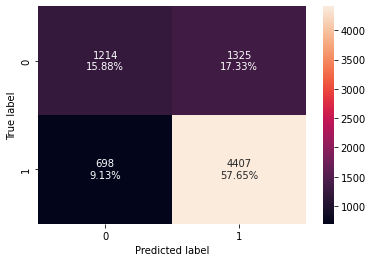

In [402]:
#Fitting the model
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb,X_train,y_train)
print("Training performance \n",xgb_classifier_model_train_perf)

xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb,X_test,y_test)
print("Training performance \n",xgb_classifier_model_test_perf)

#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(xgb, X_test,y_test)

This XGBoost classifer performs equally well on the training and testing datasets, indicating that the model is not overfitting.
Additionally, this model performs as well as the AdaBoost model and slightly worse than the Gradient Boost model on the test data.

### Base models comparison

Let's create a dataframe comparing the performance of the base models on the training data

In [403]:
models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,
     bagging_model_train_perf.T,
     rf_model_train_perf.T,
     ab_classifier_model_train_perf.T, 
     gbc_classifier_model_train_perf.T, 
     xgb_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Training performance comparison of base models:")
models_train_comp_df

Training performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,1.0,0.985367,0.999944,0.738058,0.759419,0.838248
Recall,1.0,0.986317,0.999916,0.887434,0.882901,0.931000
Precision,1.0,0.991729,1.000000,0.760411,0.784106,0.843166
F1,1.0,0.989016,0.999958,0.819027,0.830576,0.884908


Let's create a dataframe comparing the performance of the base models on the testing data

In [404]:
models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,
     bagging_model_test_perf.T,
     rf_model_test_perf.T,
     ab_classifier_model_test_perf.T, 
     gbc_classifier_model_test_perf.T, 
     xgb_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "AdaBoost Classifier",
    "Gradient Boosting Classifier",
    "XGBoost Classifier"]
print("Testing performance comparison of base models:")
models_test_comp_df

Testing performance comparison of base models:


,Decision Tree,Bagging Classifier,Random Forest,AdaBoost Classifier,Gradient Boosting Classifier,XGBoost Classifier
Accuracy,0.664443,0.692177,0.719126,0.732993,0.744636,0.735348
Recall,0.742605,0.766112,0.830167,0.885015,0.873262,0.863271
Precision,0.751884,0.771400,0.768032,0.756530,0.773555,0.768842
F1,0.747216,0.768747,0.797891,0.815744,0.820390,0.813325


Overall, the bagging models perform best on the training data, due to all three of the models overfitting this data set.
As shown above, all three of the boosting models do not overfit the data and achieve higher F1 scores on the training data set, with the Gradient Boosting classifier performing the best.

##  Will tuning the hyperparameters improve the model performance?

### Decision Tree - Hyperparameter tuning

In [405]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(5,30,5),
              'min_samples_leaf': [3, 5, 7],
              'max_leaf_nodes' : [2, 4, 6],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.729816  0.910602   0.742912  0.818254
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.722397  0.910088   0.736408  0.814088


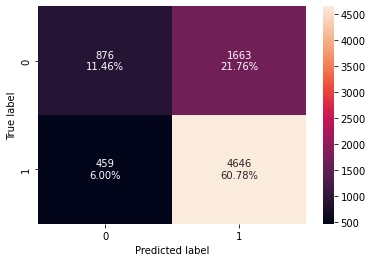

In [406]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

- The Decision Tree model after tuning performs equally well on the training and testing datasets, indicating that the model is not overfitting.
- Additionally, this model performs as well as two out of the three boosting models above on the test data.
- Both of these indicate these results indicate that the tuned model is a significant improvements over the base model.

### Bagging Classifier - Hyperparameter tuning

In [407]:
# random search for bagging classifier
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : np.arange(50, 100, 10)
             }

#run the randomized search
rand_bag = RandomizedSearchCV(BaggingClassifier(random_state=1,bootstrap=True), 
                              parameters, scoring = 'f1', cv = 5, random_state=1)
rand_bag = rand_bag.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bag_tuned = rand_bag.best_estimator_

# Fit the best algorithm to the data
bag_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.8, n_estimators=70,
                  random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.998767  0.999832   0.998324  0.999077
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.725536  0.869736   0.756002  0.808891


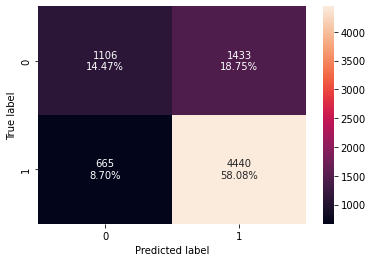

In [408]:
#Calculating different metrics
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bag_tuned, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

bagging_estimator_model_test_perf=model_performance_classification_sklearn(bag_tuned, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(bag_tuned, X_test,y_test)

- The Bagging Classifier after tuning performs far less well on the test data than on the training data, indicating that the model is still overfit.
- However, this model does perform better than the base model.

### Random Forest - Hyperparameter tuning

In [409]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10, 40, 10),
              "min_samples_leaf": np.arange(5, 10),
              "min_samples_split": [3, 5, 7],
              "max_features": ["sqrt", "log2"],
              "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Run the randomized search
rand_rf = RandomizedSearchCV(rf_estimator, parameters, scoring='f1', cv=5, n_jobs=-1, random_state=1)
rand_rf = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = rand_rf.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.729816  0.910602   0.742912  0.818254
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.722397  0.910088   0.736408  0.814088


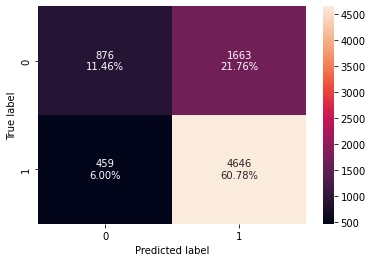

In [410]:
#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

- The Random Forest after tuning performs equally well on the training and testing datasets, indicating that the model is not overfitting.
- Additionally, this model performs as well as two out of the three boosting models and the tuned Decision Tree on the test data.
- Both of these indicate this tuned model is a significant improvements over the base model.

### AdaBoost Classifier - Hyperparameter Tuning

In [411]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=2, random_state=1, class_weight='balanced'),
                      DecisionTreeClassifier(max_depth=3, random_state=1, class_weight='balanced')],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_abc = RandomizedSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=-1, random_state=1)
rand_abc = rand_abc.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = rand_abc.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.5, n_estimators=20, random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.718603  0.781583   0.793912  0.787699
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.716117  0.781391   0.790997  0.786165


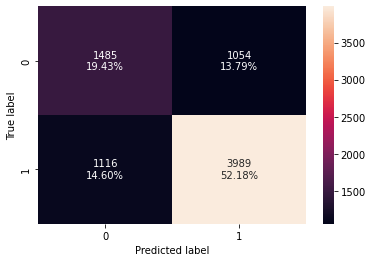

In [412]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, X_test, y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(abc_tuned, X_test,y_test)

- The AdaBoost classifier after tuning performs equally well on the training and testing datasets, indicating that the model is not overfit.
- However, this model performs worse than the base model on both the train and test data.

### GradientBoost Classifier - Hyperparameter Tuning

In [413]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250,300],
              "subsample":[0.8,0.9,1],
              "max_features":[0.7,0.8,0.9,1],
              "learning_rate": np.arange(0.1, 0.4, 0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_gb = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_gb = rand_gb.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = rand_gb.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.7, n_estimators=300, random_state=1,
                           subsample=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.729816  0.910602   0.742912  0.818254
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.722397  0.910088   0.736408  0.814088


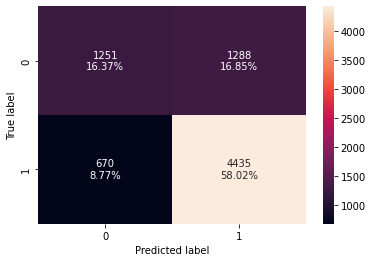

In [414]:
#Calculating different metrics
gb_tuned_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

gb_tuned_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

#create a confusion matrix of the classifier's performance on the testing data
confusion_matrix_sklearn(gb_tuned, X_test,y_test)

- The Gradient Boosting classifier after tuning performs equally well on the training and testing datasets, indicating that the model is not overfit.
- However, this model performs slightly worse than the base model on both the train and test data.

### XGB Classifer - Hyperparameter Tuning

In [415]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {"n_estimators": np.arange(10,100,20),
              "scale_pos_weight":[0,1,2,5],
              "subsample":[0.5,0.7,0.9,1],
              "learning_rate":[0.01,0.1,0.2,0.05],
              "gamma":[0,1,3],
              "colsample_bytree":[0.5,0.7,0.9,1],
              "colsample_bylevel":[0.5,0.7,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_xgb = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1, random_state=1)
rand_xgb = rand_xgb.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = rand_xgb.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=70, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.770801  0.889868    0.79248  0.838355
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.743851  0.872282   0.773225  0.819772


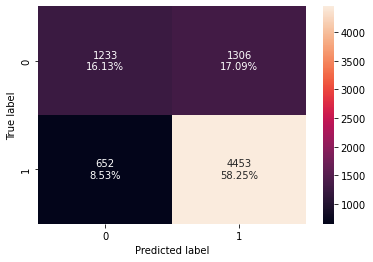

In [416]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned, X_train,y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

#create a confusion matrix of the classifier's performance on the testing data 
confusion_matrix_sklearn(xgb_tuned, X_test,y_test)

- The XGBoost classifier after tuning is less overfit than the base model, but performs equally well on the test data.
- This indicates a minor improvement over the base model.

### Tuned models comparison

Let's have a look at the dataframe comparing the performance of the tuned models on the training data

In [417]:
tuned_models_train_comp_df = pd.concat(
    [dtree_estimator_model_train_perf.T,
     bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T,
     abc_tuned_model_train_perf.T, 
     gb_tuned_model_train_perf.T, 
     xgb_tuned_model_train_perf.T],
    axis=1,
)
tuned_models_train_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Training performance comparison of tuned models:")
tuned_models_train_comp_df

Training performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.729816,0.998767,0.729816,0.718603,0.729816,0.770801
Recall,0.910602,0.999832,0.910602,0.781583,0.910602,0.889868
Precision,0.742912,0.998324,0.742912,0.793912,0.742912,0.792480
F1,0.818254,0.999077,0.818254,0.787699,0.818254,0.838355


Let's take a look at a dataframe comparing the performance of the tuned models on the testing data

In [418]:
tuned_models_test_comp_df = pd.concat(
    [dtree_estimator_model_test_perf.T,
     bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T,
     abc_tuned_model_test_perf.T, 
     gb_tuned_model_test_perf.T, 
     xgb_tuned_model_test_perf.T],
    axis=1,
)
tuned_models_test_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Testing performance comparison of tuned models:")
tuned_models_test_comp_df

Testing performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.722397,0.725536,0.722397,0.716117,0.722397,0.743851
Recall,0.910088,0.869736,0.910088,0.781391,0.910088,0.872282
Precision,0.736408,0.756002,0.736408,0.790997,0.736408,0.773225
F1,0.814088,0.808891,0.814088,0.786165,0.814088,0.819772


## Model Performance Comparison and Conclusions

In [419]:
# create a dataframe comparing the performance all models on the training data
all_models_train_comp = pd.concat([models_train_comp_df,tuned_models_train_comp_df],axis=1)
all_models_train_comp.T.sort_values('F1',ascending=False)

,Accuracy,Recall,Precision,F1
Decision Tree,1.000000,1.000000,1.000000,1.000000
Random Forest,0.999944,0.999916,1.000000,0.999958
Tuned Bagging Classifier,0.998767,0.999832,0.998324,0.999077
Bagging Classifier,0.985367,0.986317,0.991729,0.989016
XGBoost Classifier,0.838248,0.931000,0.843166,0.884908
Tuned XGBoost Classifier,0.770801,0.889868,0.792480,0.838355
Gradient Boosting Classifier,0.759419,0.882901,0.784106,0.830576
AdaBoost Classifier,0.738058,0.887434,0.760411,0.819027
Tuned Decision Tree,0.729816,0.910602,0.742912,0.818254
Tuned Random Forest,0.729816,0.910602,0.742912,0.818254


In [420]:
'The best performing model on the training data is the ' + all_models_train_comp.T.sort_values('F1',ascending=False).index[0]

'The best performing model on the training data is the Decision Tree'

Let's create a dataframe comparing the performance of all models on the testing data

In [421]:
all_models_test_comp = pd.concat([models_test_comp_df,tuned_models_test_comp_df],axis=1)
all_models_test_comp.T.sort_values('F1',ascending=False)

,Accuracy,Recall,Precision,F1
Gradient Boosting Classifier,0.744636,0.873262,0.773555,0.820390
Tuned XGBoost Classifier,0.743851,0.872282,0.773225,0.819772
AdaBoost Classifier,0.732993,0.885015,0.756530,0.815744
Tuned Decision Tree,0.722397,0.910088,0.736408,0.814088
Tuned Random Forest,0.722397,0.910088,0.736408,0.814088
Tuned Gradient Boosting Classifier,0.722397,0.910088,0.736408,0.814088
XGBoost Classifier,0.735348,0.863271,0.768842,0.813325
Tuned Bagging Classifier,0.725536,0.869736,0.756002,0.808891
Random Forest,0.719126,0.830167,0.768032,0.797891
Tuned AdaBoost Classifier,0.716117,0.781391,0.790997,0.786165


In [422]:
'The best performing model on the testing data is the ' + all_models_test_comp.T.sort_values('F1',ascending=False).index[0]

'The best performing model on the testing data is the Gradient Boosting Classifier'

Results explained:

- As expected the Decision Tree model performs the best on the training dataset, since the model will significantly overfit this data unless pruned otherwise.
- The Gradient Boosting classifier performs the best on the testing dataset, with an 0.82 F1 score.

### Let's have a look at the feature importance of the Gradient Boosting Classifier

A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

In [423]:
print(pd.DataFrame(gbc.feature_importances_, columns = ["Importance"], 
                   index = X_train.columns).sort_values(by = 'Importance', ascending = False).head(10))

                                   Importance
education_of_employee_High School    0.286718
has_job_experience_Y                 0.155771
prevailing_wage                      0.135622
education_of_employee_Master's       0.087525
education_of_employee_Doctorate      0.083296
continent_Europe                     0.062844
unit_of_wage_Year                    0.036216
region_of_employment_Midwest         0.034196
region_of_employment_South           0.019012
no_of_employees                      0.016515


In [424]:
feature_names = X_train.columns

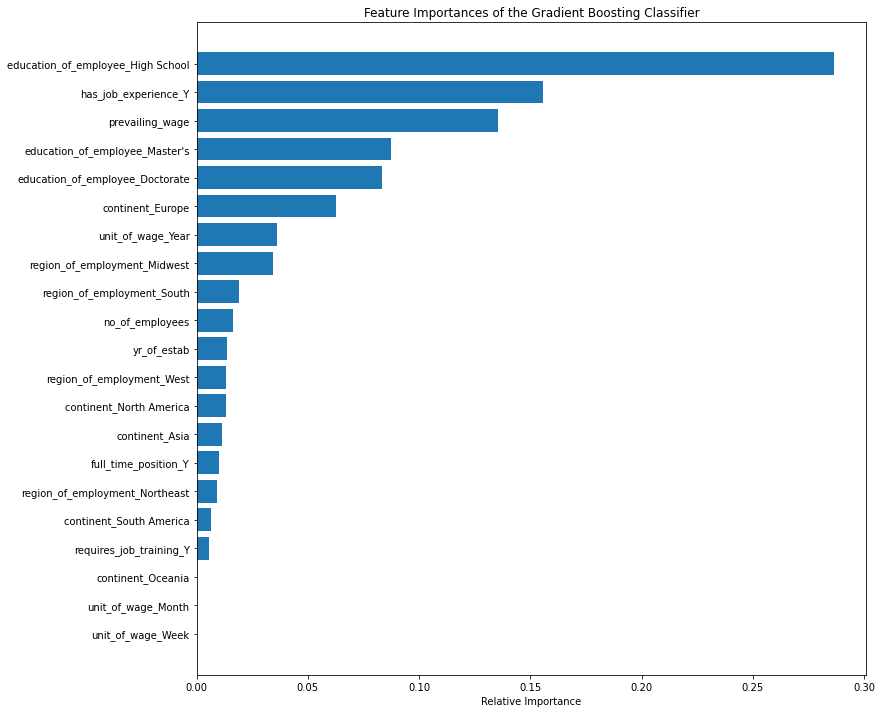

In [425]:
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances of the Gradient Boosting Classifier')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The education of employee, job experience and prevailing wages have a higher feature importance.

## Actionable Insights and Recommendations

### Insights

For the Office of Foreign Labor Certification (OFLC), the three most critical components for pre-screening an applicant are:

- Education level. An applicant applying for a job requiring a high school diploma will more than likely be denied. Conversely, applications for jobs requiring a Master's degree or doctorate are very likely to be approved.
- Prior job experience. An applicant applying for a job without any previous job experience is more likley to be denied than an applicant for a job with experience.
- Prevailing wage. The higher the prevailing wage of the job an applicant is applying for, the more likely the application will be approved. This is especially true for applications for jobs with an hourly unit of wage.

The Gradient Boosting classifier performs the best of all the models created. However, as shown above, the tuned Decision-Tree model performs barely worse by F1 score and is a far simpler model. This model may be preferable if post-hoc explanations of OFLC decision-making is expected to be required.

### Recommendations

To prioritize limited resources towards screening a batch of applications for those most likely to be approved, the OFLC can:

- Sort applications by level of education and review the higher levels of education first.
- Sort applications by previous job experience and review those with experience first.
- Divide applications for jobs into those with an hourly wage and those with an annual wage, sort each group by the prevailing wage, then review applications for salaried jobs first from highest to lowest wage.
